In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_temp = pd.read_csv('/content/drive/MyDrive/DADOS/MICRODADOS_ENEM_2023.csv',
                      sep=';',
                      encoding='ISO-8859-1',
                      nrows=5)  # Carrega apenas as 5 primeiras linhas
print(df_temp.columns)  # Mostra os nomes reais das colunas

Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',

In [ ]:
# Configurar estilo dos gráficos
sns.set(style="whitegrid")

# Caminho do arquivo
caminho_arquivo = '/content/drive/MyDrive/DADOS/MICRODADOS_ENEM_2023.csv'

# Definição das colunas necessárias
colunas = [
    'NU_INSCRICAO', 'TP_SEXO', 'TP_ESCOLA',
    'NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_REDACAO', 'SG_UF_ESC', 'SG_UF_PROVA'
]

# Carregar os dados
df = pd.read_csv(caminho_arquivo, sep=';', usecols=colunas, encoding='ISO-8859-1')

In [ ]:
# Renomear colunas para facilitar
df.rename(columns={
    'TP_SEXO': 'Sexo',
    'TP_ESCOLA': 'Tipo_Escola',
    'NU_NOTA_MT': 'Nota_Matematica',
    'NU_NOTA_LC': 'Nota_Linguagens',
    'NU_NOTA_REDACAO': 'Nota_Redacao',
    'SG_UF_ESC': 'UF',
    'SG_UF_PROVA': 'UF_Prova'

}, inplace=True)

In [ ]:
# Substituir códigos por valores mais simples
df['Sexo'].replace({1: 'Masculino', 2: 'Feminino'}, inplace=True)
df['Tipo_Escola'].replace({1: 'Não Respondeu', 2: 'Pública', 3: 'Privada'}, inplace=True)



In [ ]:
# Remover valores nulos nas notas
df.dropna(subset=['Nota_Matematica', 'Nota_Linguagens', 'Nota_Redacao'], inplace=True)

# Estatísticas básicas das notas
print(df[['Nota_Matematica', 'Nota_Linguagens', 'Nota_Redacao']].describe())



       Nota_Matematica  Nota_Linguagens  Nota_Redacao
count     2.678264e+06     2.678264e+06  2.678264e+06
mean      5.340268e+02     5.202973e+02  6.266020e+02
std       1.315292e+02     7.412317e+01  2.090321e+02
min       0.000000e+00     0.000000e+00  0.000000e+00
25%       4.314000e+02     4.737000e+02  5.200000e+02
50%       5.238000e+02     5.249000e+02  6.200000e+02
75%       6.303000e+02     5.718000e+02  7.800000e+02
max       9.586000e+02     8.208000e+02  1.000000e+03


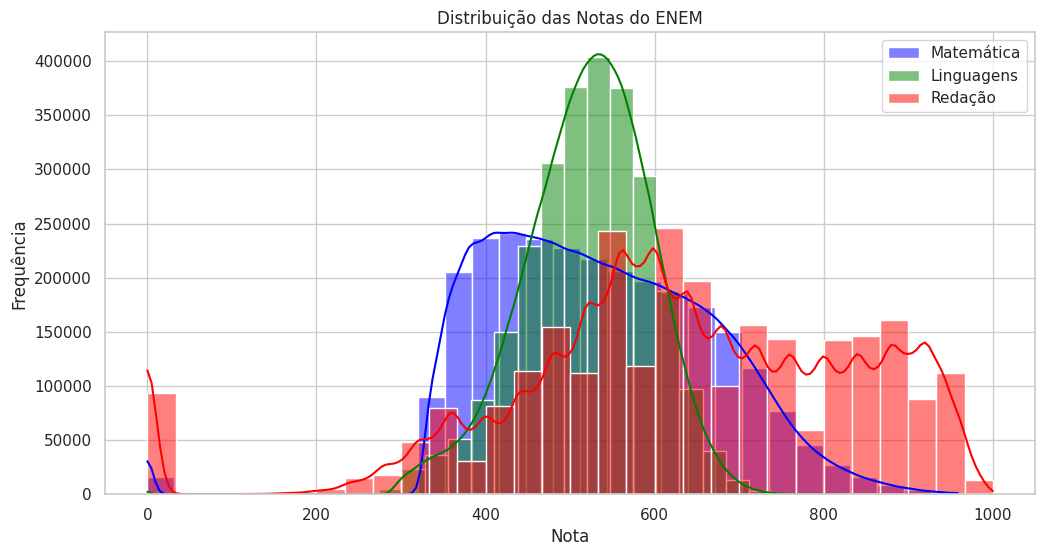

In [ ]:
# 1. Distribuição das notas
plt.figure(figsize=(12, 6))
sns.histplot(df['Nota_Matematica'], bins=30, kde=True, color='blue', label="Matemática")
sns.histplot(df['Nota_Linguagens'], bins=30, kde=True, color='green', label="Linguagens")
sns.histplot(df['Nota_Redacao'], bins=30, kde=True, color='red', label="Redação")
plt.legend()
plt.title("Distribuição das Notas do ENEM")
plt.xlabel("Nota")
plt.ylabel("Frequência")
plt.show()

##1. Linguagens (Maior frequência em torno de 500)
Interpretação: A maior parte dos alunos está concentrada em torno de 500 pontos em Linguagens. Isso pode indicar que essa é a nota média ou comum entre os participantes do ENEM.
Pode sugerir que, para muitos alunos, a compreensão e produção de textos em Linguagens não foi particularmente difícil nem fácil, sendo uma prova mais equilibrada.
##2. Matemática (Maior frequência abaixo de 500)
Interpretação: A maioria dos alunos tem notas abaixo de 500 em Matemática, o que pode ser um reflexo das dificuldades maiores com a matéria.
Isso pode sugerir que muitos alunos não têm um bom desempenho em Matemática, o que é comum em muitas avaliações devido à natureza das questões, que envolvem mais raciocínio lógico e resolução de problemas.
##3. Redação (Oscilação grande, mas fica acima de 500)
Interpretação: As notas de Redação variam bastante, mas a maioria está acima de 500, o que pode indicar que muitos alunos conseguiram apresentar uma boa argumentação e estrutura textual.
A oscilação pode ser causada por diversidade nas habilidades de escrita dos alunos, já que a redação avalia tanto a coerência e coesão quanto a capacidade de argumentação.


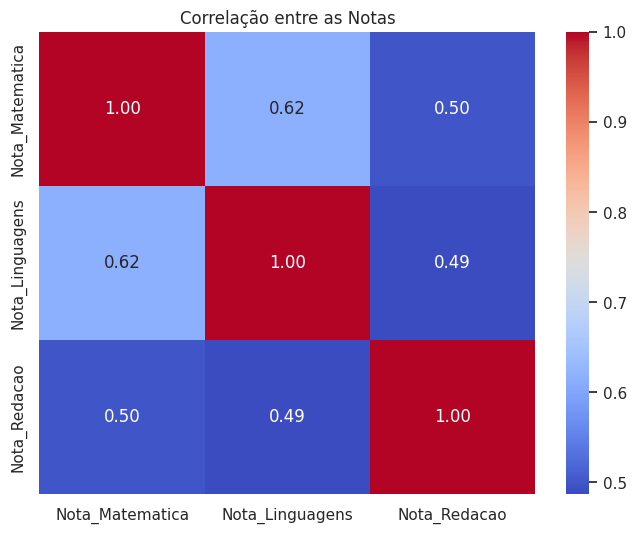

In [ ]:
# 2. Correlação entre as notas
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Nota_Matematica', 'Nota_Linguagens', 'Nota_Redacao']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlação entre as Notas")
plt.show()

##Interpretação
Matemática e Linguagens: A relação mais forte entre essas duas áreas pode ser atribuída ao fato de que ambas exigem habilidades de raciocínio lógico e interpretação.


---


Matemática e Redação: A relação mais fraca aqui é compreensível, pois as habilidades necessárias para se destacar em Matemática (pensamento abstrato, cálculo, resolução de problemas) são bastante diferentes das necessárias para a Redação (criatividade, organização de ideias, domínio da língua escrita).


---


Linguagens e Redação: A relação moderada entre essas duas áreas é esperada, já que ambas envolvem competências relacionadas à leitura e à escrita. A capacidade de compreender textos complexos e expressar ideias de forma clara e coerente é crucial tanto em Linguagens quanto em Redação. No entanto, a Redação também exige criatividade e originalidade que pode não ser tão diretamente avaliada em Linguagens.

<Figure size 1000x500 with 0 Axes>

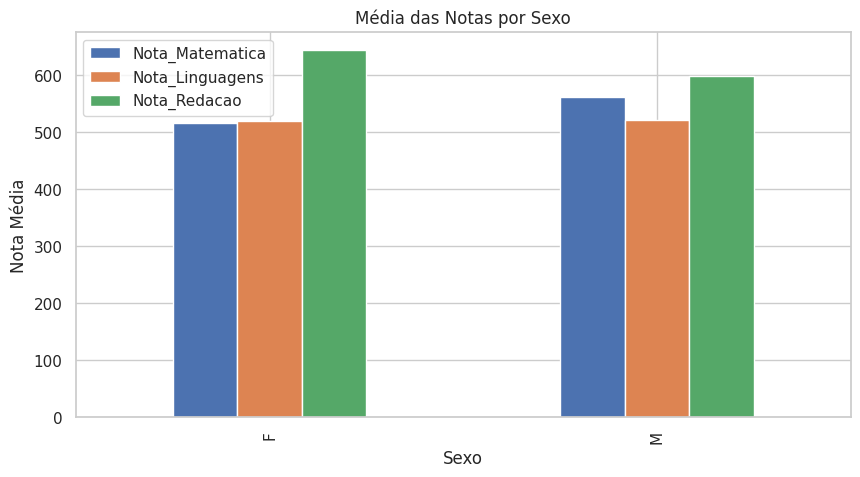

In [ ]:
# 3. Média das notas por Sexo
plt.figure(figsize=(10, 5))
df.groupby("Sexo")[['Nota_Matematica', 'Nota_Linguagens', 'Nota_Redacao']].mean().plot(kind='bar', figsize=(10,5))
plt.title("Média das Notas por Sexo")
plt.ylabel("Nota Média")
plt.show()

###Fatos


---


Mulheres demonstram um desempenho superior em áreas que exigem habilidades linguísticas, como Redação e Linguagens, refletindo uma possível maior afinidade com a expressão verbal e escrita.

A diferença em Linguagens e Redação entre os sexos é menos notável, mas as mulheres ainda mostram uma leve vantagem em ambas as áreas.

Homens têm uma superioridade mais expressiva em Matemática, sugerindo que a área de raciocínio lógico e analítico é um ponto forte para eles, com uma diferença de desempenho mais acentuada em comparação com as mulheres.


---


###Suposições

 Muitas vezes, as mulheres têm uma facilidade maior com palavras, seja escrevendo ou interpretando textos. Talvez porque, desde cedo, são incentivadas a se comunicar mais e a expressar emoções.

Já os homens costumam se destacar mais em Matemática, talvez porque são mais estimulados a lidar com números e lógica desde pequenos, como em brincadeiras que envolvem construção e estratégia.


---



<Figure size 1000x500 with 0 Axes>

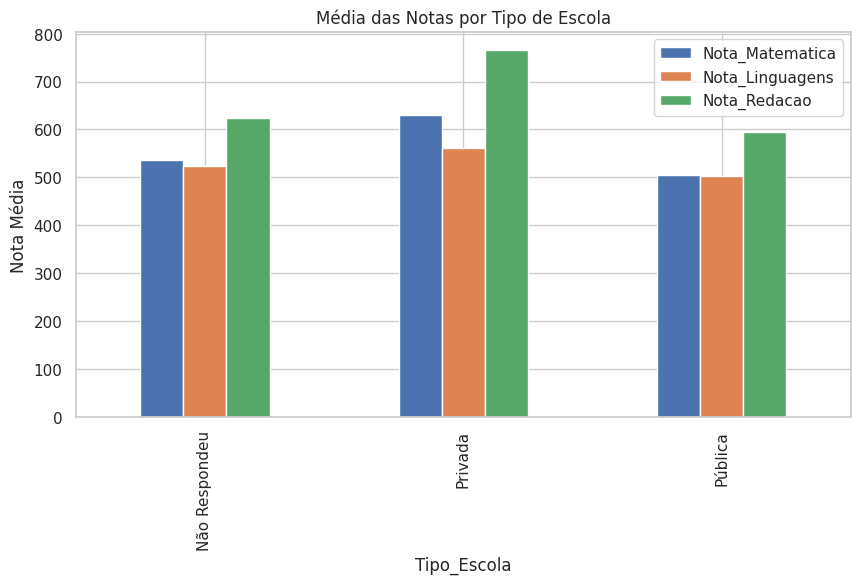

In [ ]:
# 4. Média das notas por Tipo de Escola
plt.figure(figsize=(10, 5))
df.groupby("Tipo_Escola")[['Nota_Matematica', 'Nota_Linguagens', 'Nota_Redacao']].mean().plot(kind='bar', figsize=(10,5))
plt.title("Média das Notas por Tipo de Escola")
plt.ylabel("Nota Média")
plt.show()

Nas escolas privadas, as notas em Linguagens, Matemática e Redação são significativamente mais altas.

Nas escolas públicas, o desempenho é bem inferior, principalmente em Matemática e Redação, onde a diferença para as privadas é gritante. As notas em Linguagens também são bem mais baixas, mas não chegam a ser tão extremas quanto nas outras áreas.

Esses resultados mostram uma desigualdade clara entre as escolas públicas e privadas, com as privadas se destacando devido a melhores condições de ensino, enquanto as públicas enfrentam sérios desafios que afetam o desempenho dos alunos.

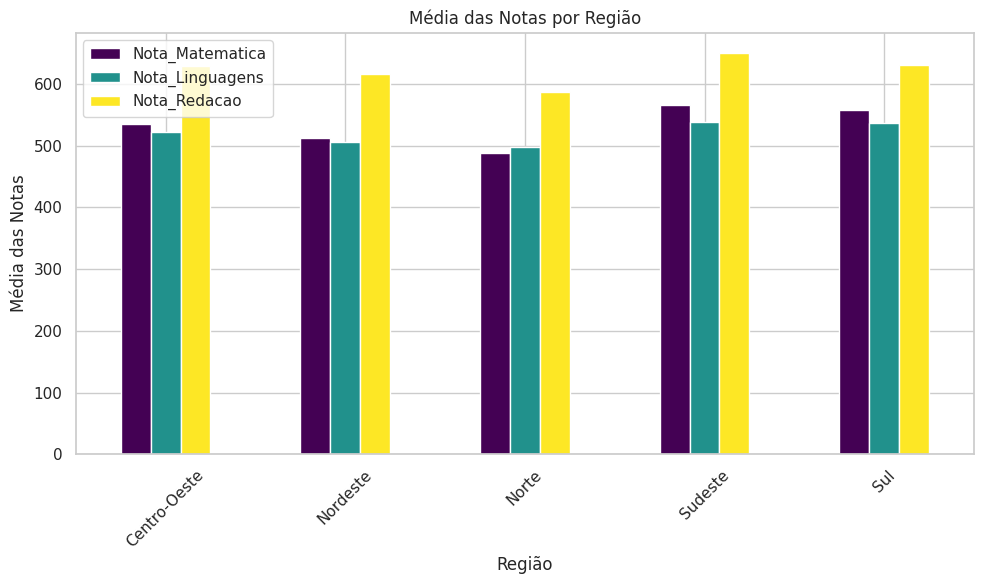

In [ ]:
# 5. Médias por Região
# Mapeando os estados para as regiões
regioes = {
    'AC': 'Norte', 'AL': 'Nordeste', 'AM': 'Norte', 'AP': 'Norte', 'BA': 'Nordeste', 'CE': 'Nordeste',
    'DF': 'Centro-Oeste', 'ES': 'Sudeste', 'GO': 'Centro-Oeste', 'MA': 'Nordeste', 'MG': 'Sudeste',
    'MS': 'Centro-Oeste', 'MT': 'Centro-Oeste', 'PA': 'Norte', 'PB': 'Nordeste', 'PE': 'Nordeste',
    'PI': 'Nordeste', 'PR': 'Sul', 'RJ': 'Sudeste', 'RN': 'Nordeste', 'RO': 'Norte', 'RR': 'Norte',
    'RS': 'Sul', 'SC': 'Sul', 'SE': 'Nordeste', 'SP': 'Sudeste', 'TO': 'Norte'
}

# Adicionando a coluna 'Regiao'
df['Regiao'] = df['UF_Prova'].map(regioes)

# Calculando a média das notas por região
notas_por_regiao = df.groupby('Regiao')[['Nota_Matematica', 'Nota_Linguagens', 'Nota_Redacao']].mean()

# Plotando o gráfico de colunas
notas_por_regiao.plot(kind='bar', figsize=(10, 6), cmap='viridis')

# Ajustando o gráfico
plt.title('Média das Notas por Região')
plt.xlabel('Região')
plt.ylabel('Média das Notas')
plt.xticks(rotation=45)
plt.tight_layout()

# Exibindo o gráfico
plt.show()


O gráfico mostra que as regiões Norte e Nordeste têm as menores médias de notas no ENEM, enquanto o Sudeste lidera, seguido pelo Sul e Centro-Oeste, que estão em um nível intermediário.

 Essa distribuição reflete a desigualdade educacional no Brasil, com as regiões mais desenvolvidas apresentando melhores desempenhos. A discrepância mostra a necessidade de políticas públicas focadas na melhoria da educação nas regiões Norte e Nordeste.

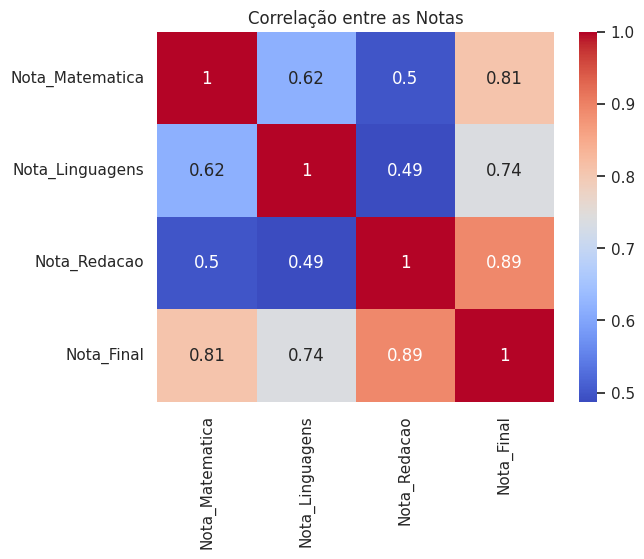

In [ ]:
# 6. Impacto da redação na nota final
# Criar a variável de Nota Final
df['Nota_Final'] = df[['Nota_Matematica', 'Nota_Linguagens', 'Nota_Redacao']].mean(axis=1)

# Gráfico
sns.heatmap(df[['Nota_Matematica', 'Nota_Linguagens', 'Nota_Redacao', 'Nota_Final']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlação entre as Notas')
plt.show()

Alto valor de correlação sugere que a nota de redação pode ser um fator determinante para o desempenho final, especialmente considerando que ela possui um peso considerável no exame. Para um desempenho final elevado, é provável que o candidato também tenha se saído bem na redação.